In [1]:
tweets = read.csv("tweets.csv", stringsAsFactors=FALSE)

str(tweets)



'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [2]:

# Create dependent variable

tweets$Negative = as.factor(tweets$Avg <= -1)

table(tweets$Negative)


FALSE  TRUE 
  999   182 

In [4]:
install.packages("SnowballC", repos="http://cran.stat.ucla.edu/")


The downloaded source packages are in
	‘/private/var/folders/37/nz8s2zfd5j11_ck6wrwbhryr0000gn/T/RtmpwQKHkQ/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:

library(tm)
library(SnowballC)


In [6]:
# Create corpus
 
corpus = Corpus(VectorSource(tweets$Tweet))

# Look at corpus
corpus

corpus[[1]]

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 101

In [11]:
# Convert to lower-case

corpus = tm_map(corpus, tolower)

corpus[[1]]$content

# IMPORTANT NOTE: If you are using the latest version of the tm package, you will need to run the following line before continuing (it converts corpus to a Plain Text Document). This is a recent change having to do with the tolower function that occurred after this video was recorded.

corpus = tm_map(corpus, PlainTextDocument)

ERROR: Error in corpus[[1]]$content: $ operator is invalid for atomic vectors


In [12]:
# Remove punctuation

corpus = tm_map(corpus, removePunctuation)

corpus[[1]]$content


[1] "   say    far  best customer care service   ever received  appstore"

In [9]:
# Look at stop words 
stopwords("english")[1:10]


[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [13]:
# Remove stopwords and apple

corpus = tm_map(corpus, removeWords, c("apple", stopwords("english")))

corpus[[1]]$content


[1] "   say    far  best customer care service   ever received  appstore"

In [14]:
# Stem document 

corpus = tm_map(corpus, stemDocument)

corpus[[1]]$content



[1] "   say    far  best custom care servic   ever receiv  appstor"

In [15]:
# Create matrix

frequencies = DocumentTermMatrix(corpus)

frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [16]:
# Look at matrix 

inspect(frequencies[1000:1005,505:515])


<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 9
Weighting          : term frequency (tf)

              Terms
Docs           cheapen cheaper check cheep cheer cheerio cherylcol chief
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     1       0         0     0
              Terms
Docs           chiiiiqu child children
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0


In [17]:
# Check for sparsity

findFreqTerms(frequencies, lowfreq=20)


[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"

In [18]:
# Remove sparse terms

sparse = removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [19]:
# Convert to a data frame

tweetsSparse = as.data.frame(as.matrix(sparse))


In [20]:
# Make all variable names R-friendly

colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

In [21]:

# Add dependent variable

tweetsSparse$Negative = tweets$Negative

In [22]:
# Split the data

library(caTools)

set.seed(123)

split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)

trainSparse = subset(tweetsSparse, split==TRUE)
testSparse = subset(tweetsSparse, split==FALSE)


In [23]:

findFreqTerms(frequencies, lowfreq=100)


[1] "iphon" "itun"  "new"

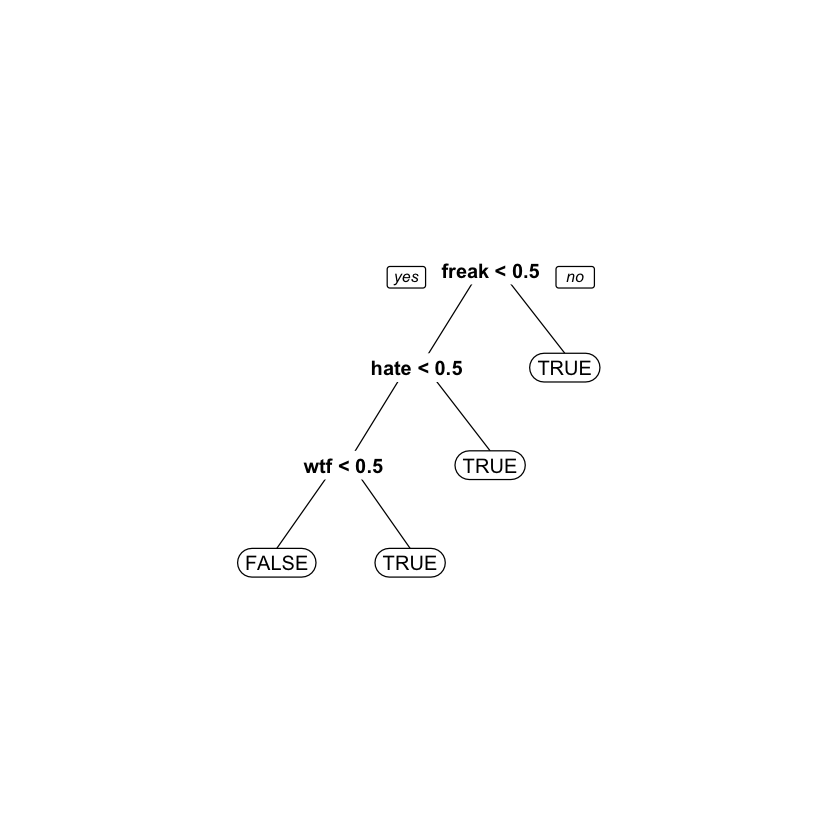

In [24]:
# Video 7

# Build a CART model

library(rpart)
library(rpart.plot)

tweetCART = rpart(Negative ~ ., data=trainSparse, method="class")

prp(tweetCART)

In [25]:
# Evaluate the performance of the model
predictCART = predict(tweetCART, newdata=testSparse, type="class")

table(testSparse$Negative, predictCART)


       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [26]:
# Compute accuracy

(294+18)/(294+6+37+18)

[1] 0.8788732

In [27]:
# Baseline accuracy 

table(testSparse$Negative)

300/(300+55)


FALSE  TRUE 
  300    55 

[1] 0.8450704

In [28]:
# Random forest model

library(randomForest)
set.seed(123)

tweetRF = randomForest(Negative ~ ., data=trainSparse)


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [29]:
# Make predictions:
predictRF = predict(tweetRF, newdata=testSparse)

table(testSparse$Negative, predictRF)


       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     34   21

In [30]:
# Accuracy:
(293+21)/(293+7+34+21)

[1] 0.884507

In [32]:
# Logistic Regression Model
tweetLog = glm(Negative ~ ., data=trainSparse, , family=binomial)
summary(tweetLog)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Negative ~ ., family = binomial, data = trainSparse)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (7 not defined because of singularities)
                       Estimate Std. Error    z value Pr(>|z|)    
(Intercept)          -1.192e+15  5.330e+06 -223730965   <2e-16 ***
X244tsuyoponzu        1.192e+15  5.330e+06  223721111   <2e-16 ***
X7evenstarz           2.969e+15  4.542e+07   65363540   <2e-16 ***
actual               -5.638e+14  2.884e+07  -19550250   <2e-16 ***
add                  -7.916e+14  6.062e+07  -13057595   <2e-16 ***
alreadi              -3.370e+14  3.772e+07   -8935147   <2e-16 ***
alway                -1.758e+15  4.813e+07  -36537047   <2e-16 ***
amaz                 -4.643e+14  3.977e+07  -11674796   <2e-16 ***
amazon                3.320e+14  9.950e+07    3336687   <2e-16 ***
android               6.360e+14  2.007e+07   31684676   <2e-16 ***
announc              -2.204e+

In [33]:
predictions = predict(tweetLog, newdata=testSparse, type="response")



Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

In [35]:
table(testSparse$Negative, predictions > 0.5)


       
        FALSE TRUE
  FALSE   254   46
  TRUE     22   33

In [36]:
(254 + 33)/(293+7+34+21)

[1] 0.8084507